In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Oriserve/Evaluation-dataset.csv',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

0         0
1      2003
2      5893
3      8594
4      9687
5     10004
6     10096
7     10119
8     10124
9     10128
10    10131
11    10131
12    10131
13    10131
14    10131
dtype: int64

##### I have merged all the positive and negative sentiments from the reviews into one list


In [ ]:
len(df)

10132

In [ ]:
reviews=[]
sentiments=[]
for i in range(len(df)):
    reviews.append(df[0].iloc[i])
    subthemes=[]
    for j in range(1,15):
        if type(df[j].iloc[i])==float:
            pass
        elif df[j].iloc[i].split(" ")[-1] in ['positive','negative']:
            subthemes.append(df[j].iloc[i])
        else:
            pass
    sentiments.append(subthemes)

In [ ]:
reviews[0]

'Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.'

In [ ]:
sentiments[0]

['garage service positive', 'ease of booking positive']

In [ ]:
df_review=pd.DataFrame()
df_review["Review"]=reviews
df_review["Sentiment"]=sentiments

In [ ]:
df_review=pd.DataFrame()
df_review["Review"]=reviews
df_review["Sentiment"]=sentiments
df_review.head(5)

,Review,Sentiment
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi..."
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi..."
2,Very easy to use and good value for money.,[value for money positive]
3,Really easy and convenient to arrange,[ease of booking positive]
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ..."


##### Finding the unique subthemes in the dataset.

In [ ]:
s=[]
for i in df_review['Sentiment'].values:
    for j in i:
        s.append(j)
subtheme=[]
for i in np.unique(s):
    subtheme.append(" ".join(i.split(" ")[:-1]))
subtheme=np.unique(subtheme)

In [ ]:
df_review["Sentiment"]=sentiments

In [ ]:
def count_positive_negative(subtheme,df):
    """
    Count positive and negative reviews for each subtheme
    """
    positive=subtheme+" positive"
    negative=subtheme+" negative"
    positive_count=0
    negative_count=0
    for i in df['Sentiment'].values:
        if i.count(positive)>0:
            positive_count=positive_count+1
        elif i.count(negative)>0:
            negative_count=negative_count+1
        else:
            pass
    return [positive_count,negative_count],sum([positive_count,negative_count])

In [ ]:
count_positive_negative_dict={}
for i in subtheme:
    a={}
    a["positive"]=count_positive_negative(i,df_review)[0][0]
    a["negative"]=count_positive_negative(i,df_review)[0][1]
    a["sum"]=count_positive_negative(i,df_review)[-1]
    count_positive_negative_dict[i]=a

In [ ]:
count_positive_negative_dict

{'advisor/agent service': {'positive': 202, 'negative': 47, 'sum': 249},
 'advisoragent service': {'positive': 233, 'negative': 125, 'sum': 358},
 'balancing': {'positive': 14, 'negative': 24, 'sum': 38},
 'booking confusion': {'positive': 2, 'negative': 118, 'sum': 120},
 'call wait time': {'positive': 1, 'negative': 24, 'sum': 25},
 'change of date': {'positive': 21, 'negative': 277, 'sum': 298},
 'change of time': {'positive': 1, 'negative': 42, 'sum': 43},
 'damage': {'positive': 0, 'negative': 126, 'sum': 126},
 'delivery punctuality': {'positive': 452, 'negative': 246, 'sum': 698},
 'discount not applied': {'positive': 1, 'negative': 9, 'sum': 10},
 'discounts': {'positive': 115, 'negative': 25, 'sum': 140},
 'ease of booking': {'positive': 1187, 'negative': 208, 'sum': 1395},
 'extra charges': {'positive': 84, 'negative': 45, 'sum': 129},
 'facilities': {'positive': 33, 'negative': 18, 'sum': 51},
 'failed payment': {'positive': 1, 'negative': 5, 'sum': 6},
 'garage service': {'

In [ ]:
count=[]
for i in subtheme:
    count.append(count_positive_negative_dict[i]["sum"])

<BarContainer object of 32 artists>

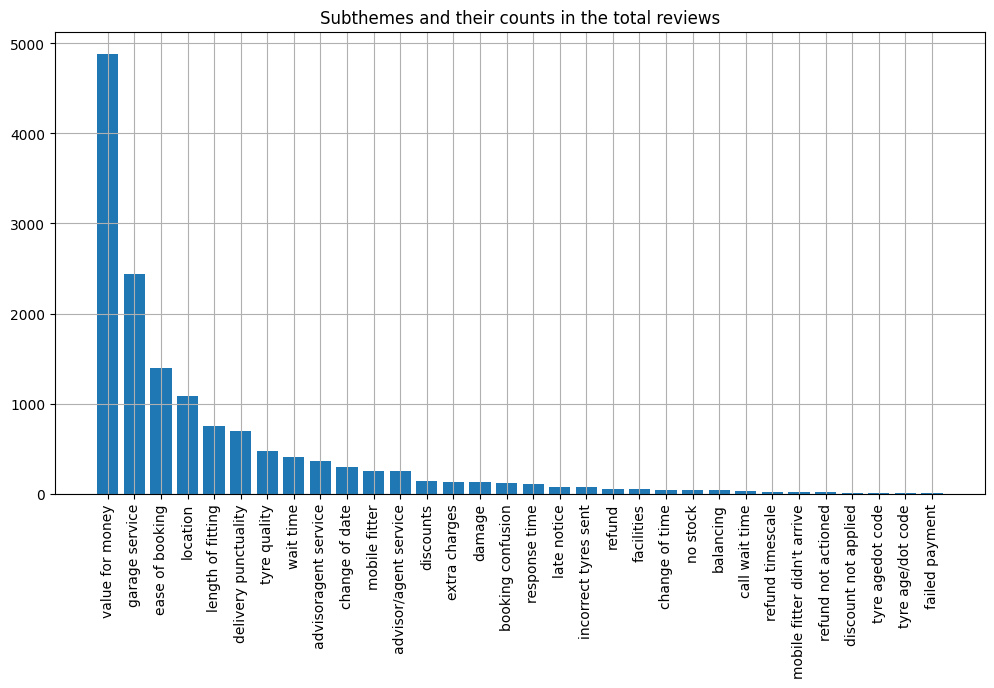

In [ ]:
df_count=pd.DataFrame()
df_count['Subtheme']=subtheme
df_count['Count']=count
df_count.sort_values("Count",ascending=False,inplace=True)
plt.figure(figsize=(12,6))
plt.grid()
plt.title("Subthemes and their counts in the total reviews")
plt.xticks(rotation="vertical")
plt.bar(x=df_count['Subtheme'],height=df_count['Count'])

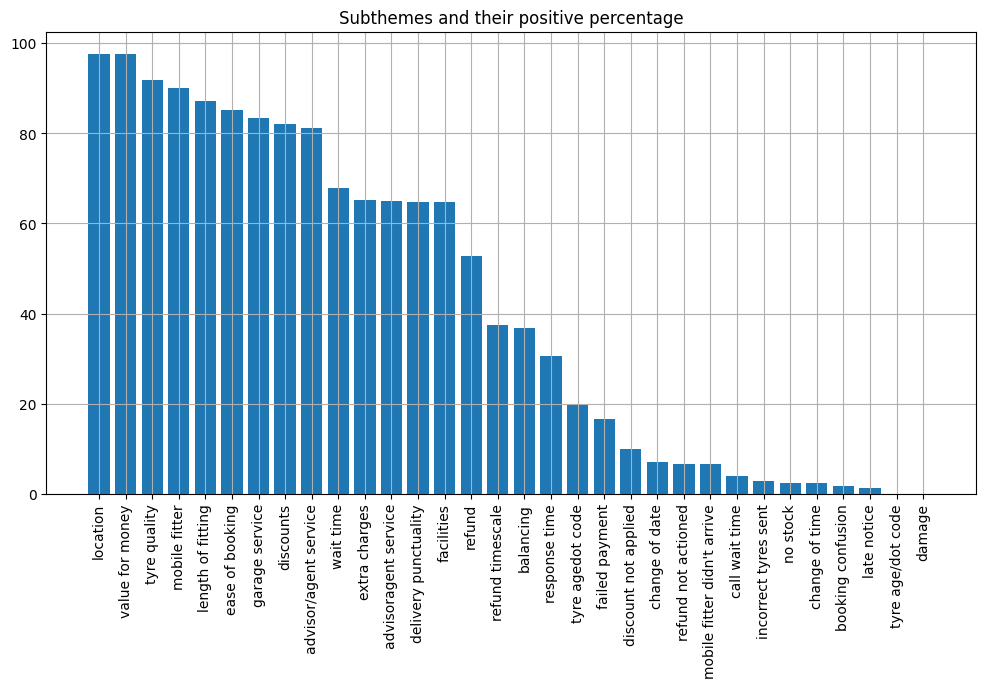

In [ ]:
df_positive_percentage=pd.DataFrame()
positive_percentage=[]
for i in subtheme:
    positive_percentage.append((count_positive_negative_dict[i]['positive']/count_positive_negative_dict[i]['sum'])*100)
df_positive_percentage['Subtheme']=subtheme
df_positive_percentage['Positive Percentage']=positive_percentage
df_positive_percentage.sort_values(['Positive Percentage'],inplace=True,ascending=False)
plt.figure(figsize=(12,6))
plt.bar(x=df_positive_percentage['Subtheme'],height=df_positive_percentage['Positive Percentage'])
plt.title("Subthemes and their positive percentage")
plt.xticks(rotation="vertical")
plt.grid()

In [ ]:
df_review.to_csv("/content/drive/MyDrive/Oriserve/Reviews_Sentiments.csv")

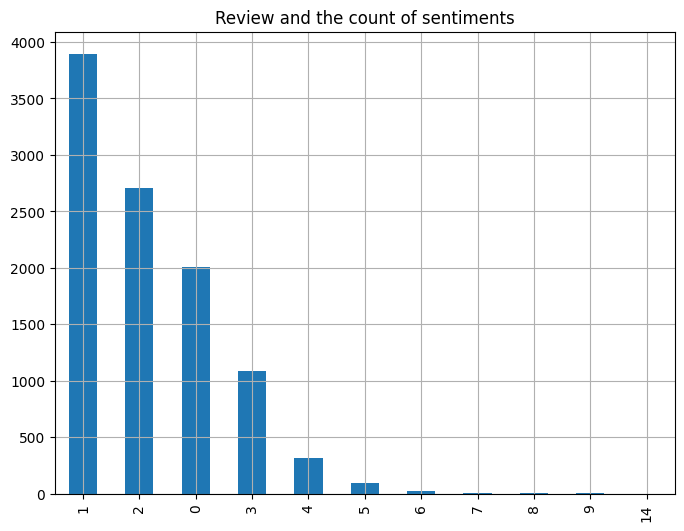

In [ ]:
number_reviews=[]
for i in df_review['Sentiment'].values:
    number_reviews.append(len(i))
plt.figure(figsize=(8,6))
plt.title("Review and the count of sentiments")
pd.value_counts(number_reviews).plot(kind='bar')
plt.grid()